# TALLER: Multi Layer Perceptron

Implementa una red neuronal de tres capas según la siguiente función de predicción.

$$\hat{y} = \text{sigmoid} ( \mathbf{W}_3 \cdot \tanh(\mathbf{W}_2 \cdot \tanh(\mathbf{x^T} \cdot \mathbf{W}_1 + \mathbf{b}_1) + \mathbf{b}_2) + b_3 )$$

$$J(\mathbf{b}_1, b_2, \mathbf{W}_1, \mathbf{W}_2) = \frac{1}{m}\sum_{i=0}^{m-1} (\hat{y}-y)^2 $$

observa que ahora tenemos dos tamaños para las dos capas escondidas. P.ej. si esos tamaños son 4 y 6 respectivamente, estas serían las dimensiones de los pesos:

- $W_1$: (2, 4)
- $W_2$: (4, 6)
- $W_3$: (6, 1)
- $b_1$: (4)
- $b_2$: (6)
- $b_3$: (1)


1.9.0


/opt/miniconda/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


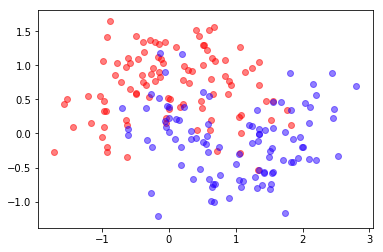

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
print tf.__version__
from sklearn.datasets import make_moons
import mlutils
X,y = make_moons(200,noise=.4)
mlutils.plot_2Ddata(X,y)

### Parámetros de entrada

In [3]:
input_units  = 2
h_units_1    = 4
h_units_2    = 6
output_units = 1

### Grafo computacional

In [4]:
tf.reset_default_graph()

# symbolic vars for model parameters
tW1 = tf.Variable(initial_value=tf.random_uniform([input_units, h_units_1], dtype=tf.float64), name="W1", dtype=tf.float64)
tb1 = tf.Variable(initial_value=tf.random_uniform([h_units_1],dtype=tf.float64), name="b1", dtype=tf.float64)
tW2 = tf.Variable(initial_value=tf.random_uniform([h_units_1, h_units_2], dtype=tf.float64), name="W2", dtype=tf.float64)
tb2 = tf.Variable(initial_value=tf.random_uniform([h_units_2], dtype=tf.float64), name="b2", dtype=tf.float64)
tW3 = tf.Variable(initial_value=tf.random_uniform([h_units_2,output_units], dtype=tf.float64), name="W3", dtype=tf.float64)
tb3 = tf.Variable(initial_value=tf.random_uniform([output_units], dtype=tf.float64), name="b3", dtype=tf.float64)

# symbolic vars for data
tX = tf.placeholder(name="X", dtype=tf.float64, shape = (None, input_units))
ty = tf.placeholder(name="y", dtype=tf.float64, shape = (None, output_units))


In [5]:
print tW1.shape
print tW2.shape
print tW3.shape
print tb1.shape
print tb2.shape
print tb3.shape


(2, 4)
(4, 6)
(6, 1)
(4,)
(6,)
(1,)


In [6]:
y_hat = tf.sigmoid(tf.matmul(tf.tanh(tf.matmul(tf.tanh(tf.matmul(tX,tW1)+tb1), tW2) + tb2),tW3)+tb3)
loss  = tf.reduce_mean(tf.pow((y_hat - ty),2))

### Optimización

In [7]:
optimizer_gd = tf.train.GradientDescentOptimizer(.5).minimize(loss)

init = tf.global_variables_initializer()

loss_hist = []
steps = 5000

with tf.Session() as sess:
    sess.run(init)
    
    for i in mlutils.pbar()(xrange(1,steps)):
        # parameter update
        sess.run(optimizer_gd, feed_dict={tX: X, ty: y.reshape(-1,1)})
        # history
        if i%10==0:
            loss_val = sess.run(loss, feed_dict={tX: X, ty: y.reshape(-1,1)})
            loss_hist.append(loss_val)
        
    val_W1, val_W2, val_W3, val_b1, val_b2, val_b3 = sess.run([tW1, tW2, tW3, tb1, tb2, tb3])

100% (4999 of 4999) |#####################| Elapsed Time: 0:00:05 Time: 0:00:05


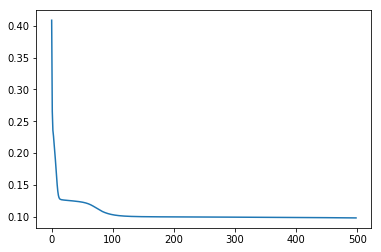

In [8]:
plt.plot(loss_hist)

### Predicción

your prediction boundary should look more complex than the single layer neural network seen in the notes. For instance (although not exacly like this):

![AA](Images/lab_lowlevel_01.png)


In [9]:
def predict(X):
    with tf.Session() as sess:
        preds = sess.run(y_hat, feed_dict={tX: X,  
                                           tW1: val_W1, tW2: val_W2, tW3: val_W3, 
                                           tb1: val_b1, tb2: val_b2, tb3: val_b3})
    return (preds[:,0]>.5).astype(int)

(0.505025, 0.494975)

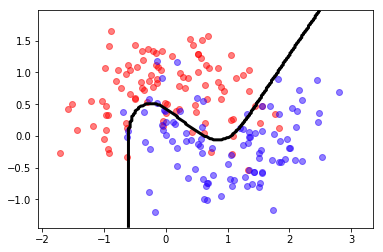

In [10]:
mlutils.plot_2Ddata_with_boundary(predict, X, y)